In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = ['STKaiti']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
def load_dataset():
    # 采样点数
    N_SAMPLES = 2000
    # 测试数量比率
    TEST_SIZE = 0.3
    # 利用工具函数直接生成数据集
    X, y = make_moons(n_samples=N_SAMPLES, noise=0.2, random_state=100)
    # 将 2000 个点按着 7:3 分割为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)
    return X, y, X_train, X_test, y_train, y_test

In [21]:
def plot_dot(X,y,plot_name):
    plt.figure(figsize=(16, 8))
    axes = plt.gca()
    axes.set(xlabel="$x_1$", ylabel="$x_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)

    # 绘制散点图，根据标签区分颜色
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='none')

(2000, 2) (2000,) (1400, 2) (600, 2)
[1 1 1 0 0 0 0 1 1 1]
[-0.12334611  0.47982802]


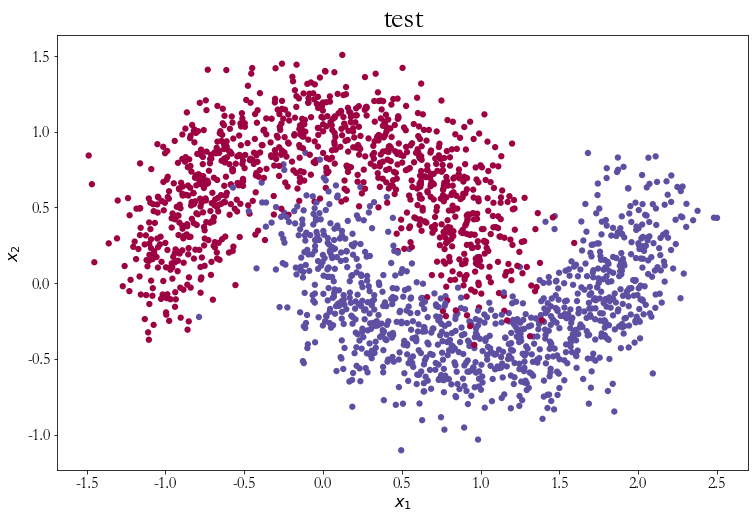

In [22]:
X, y, X_train, X_test, y_train, y_test = load_dataset()
print(X.shape,y.shape,X_train.shape,X_test.shape)
print(y[0:10])
print(X[0])

plot_dot(X,y,"test")

In [39]:
class Layer:
    def __init__(self,n_input,n_neurons,activation=None,weights=None,bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input,n_neurons)*np.sqrt(1/n_neurons)
        self.bias = bias if bias is not None else np.random.rand(n_neurons)*0.1
        self.activation = activation
        self.last_activation = None
        self.error = None
        self.delta = None

    def activate(self,x):
        r = np.dot(x,self.weights)+self.bias
        self.last_activation = self.__apply_activation(r)
        return self.last_activation

    def __apply_activation(self,r):
        if self.activation == 'relu':
            return np.maximum(r,0)
        elif self.activation == 'tanh':
            return np.tanh(r)
        elif self.activation == 'sigmoid':
            return 1/(1+np.exp(-r))
        elif self.activation is None:
            return r
        return r
    
    def apply_activation_derivative(self,r):
        if self.activation is None:
            return np.ones_like(r)
        elif self.activation == 'relu':
            grad = np.array(r).copy
            grad[r>0] = 1.
            grad[r<=0] = 0.
            return grad
        elif self.activation == 'tanh':
            return 1-r**2
        elif self.activation == 'sgimoid':
            return r*(1-r)
        return r

            
            

In [40]:
class NeuralNetwork:
    def __init__(self):
        self._layers=[]

    def add_layer(self,layer):
        self._layers.append(layer)
    
    def feed_forward(self,X):
        for layer in self._layers:
            X=layer.activate(X)
        return X
    
    def backpropagation(self,X,y,learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            # 最后一层，先计算loss函数的梯度，使用均方差loss
            if layer == self._layers[-1]:
                layer.error = y-output
                layer.delta = layer.error * layer.apply_activation_derivative(output)
            else:
                next_layer = self._layers[i+1]
                layer.error = np.dot(next_layer.weights,next_layer.delta)
                layer.delta = layer.error * layer.apply_activation_derivative(layer.last_activation)

        for i in range(len(self._layers)):
            layer = self._layers[i]

            o_i = np.atleast_2d(X if i==0 else self._layers[i-1].last_activation)

            layer.weights += layer.delta * o_i.T * learning_rate

    def train(self, X_train, X_test, y_train, y_test, learning_rate, max_epochs):
        y_onehot = np.zeros((y_train.shape[0],2))
        y_onehot[np.arange(y_train.shape[0]),y_train] = 1

        mses = []
        accuracys = []

        for i in range(max_epochs+1):
            for j in range(len(X_train)):
                self.backpropagation(X_train[j], y_onehot[j], learning_rate)
            
            if i % 10 == 0:
                mse = np.mean(np.square(y_onehot - self.feed_forward(X_train)))
                mses.append(mse)
                accuracy = self.accuracy(self.predict(X_test), y_test.flatten())
                accuracys.append(accuracy)
                print('Epoch: #%s, MSE: %f' % (i, float(mse)))
                # 统计并打印准确率
                print('Accuracy: %.2f%%' % (accuracy * 100))
        return mses, accuracys

    def predict(self,X):
        return self.feed_forward(X)

    def accuracy(self,X,y):
        return np.sum(np.equal(np.argmax(X,axis=1),y))/y.shape[0]


            


    

In [41]:
nn = NeuralNetwork()  # 实例化网络类
nn.add_layer(Layer(2, 25, 'sigmoid'))  # 隐藏层 1, 2=>25
nn.add_layer(Layer(25, 50, 'sigmoid'))  # 隐藏层 2, 25=>50
nn.add_layer(Layer(50, 25, 'sigmoid'))  # 隐藏层 3, 50=>25
nn.add_layer(Layer(25, 2, 'sigmoid'))  # 输出层, 25=>2
mses, accuracys = nn.train(X_train, X_test, y_train, y_test, 0.01, 1000)

NameError: name 'ouput' is not defined